In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_births = pd.read_csv('../data/births_combined.csv')

In [3]:
all_births.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [4]:
all_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           7670 non-null   int64
 1   month          7670 non-null   int64
 2   date_of_month  7670 non-null   int64
 3   day_of_week    7670 non-null   int64
 4   births         7670 non-null   int64
dtypes: int64(5)
memory usage: 299.7 KB


In [5]:
#converting column from int64 to string in order to replace numerical values of days of the week into text values.
all_births['day_of_week'] = all_births['day_of_week'].astype(str)
all_births['month'] = all_births['month'].astype(str)

In [6]:
all_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           7670 non-null   int64 
 1   month          7670 non-null   object
 2   date_of_month  7670 non-null   int64 
 3   day_of_week    7670 non-null   object
 4   births         7670 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 299.7+ KB


In [7]:
#replacing values
replaced_days = {
    "1": "Monday",
    "2": "Tuesday",
    "3": "Wednesday",
    "4": "Thursday",
    "5": "Friday",
    "6": "Saturday",
    "7": "Sunday"
}

In [8]:
all_births['day_of_week'] = all_births['day_of_week'].replace(replaced_days)

In [9]:
all_births.head(20)

,year,month,date_of_month,day_of_week,births
0,1994,1,1,Saturday,8096
1,1994,1,2,Sunday,7772
2,1994,1,3,Monday,10142
3,1994,1,4,Tuesday,11248
4,1994,1,5,Wednesday,11053
5,1994,1,6,Thursday,11406
6,1994,1,7,Friday,11251
7,1994,1,8,Saturday,8653
8,1994,1,9,Sunday,7910
9,1994,1,10,Monday,10498


In [10]:
avg_births_day = all_births.groupby('day_of_week')['births'].mean().reset_index()

In [11]:
avg_births_day.sort_values(by='births', ascending=False)

,day_of_week,births
5,Tuesday,12841.802920
6,Wednesday,12620.875000
4,Thursday,12551.800913
0,Friday,12349.235616
1,Monday,11606.728102
2,Saturday,8621.960766
3,Sunday,7635.369526


In [12]:
avg_births_day_sorted = avg_births_day.sort_values(by='births', ascending=False)

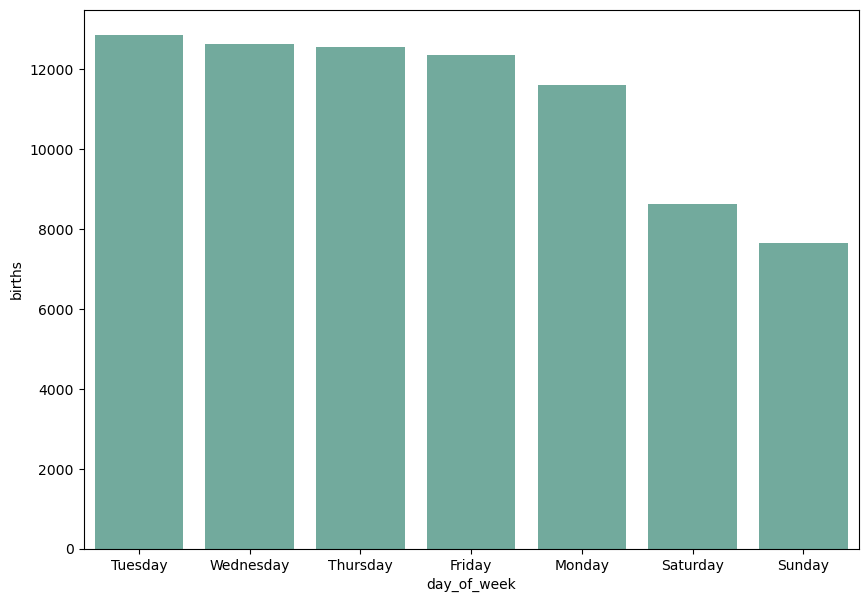

In [13]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=avg_births_day_sorted,
    x="day_of_week", 
    y="births",  
    color='#69b3a2');

In [14]:
replaced_months = {
    "1": "January",
    "2": "February",
    "3": "March",
    "4": "April",
    "5": "May",
    "6": "June",
    "7": "July",
    "8": "August",
    "9": "September",
    "10": "October",
    "11": "November",
    "12": "December"
}

In [15]:
all_births['month'] = all_births['month'].replace(replaced_months)

In [16]:
all_births.head()

,year,month,date_of_month,day_of_week,births
0,1994,January,1,Saturday,8096
1,1994,January,2,Sunday,7772
2,1994,January,3,Monday,10142
3,1994,January,4,Tuesday,11248
4,1994,January,5,Wednesday,11053


In [17]:
avg_births_month = all_births.groupby('month')['births'].mean().reset_index()

In [18]:
avg_births_month.sort_values(by='births', ascending=False)

,month,births
11,September,11810.569841
1,August,11712.175115
5,July,11562.648233
6,June,11305.692063
10,October,11204.027650
8,May,11022.069124
2,December,10990.938556
3,February,10980.939292
7,March,10979.059908
9,November,10927.258730


In [19]:
avg_births_month_sorted = avg_births_month.sort_values(by='births', ascending=False)

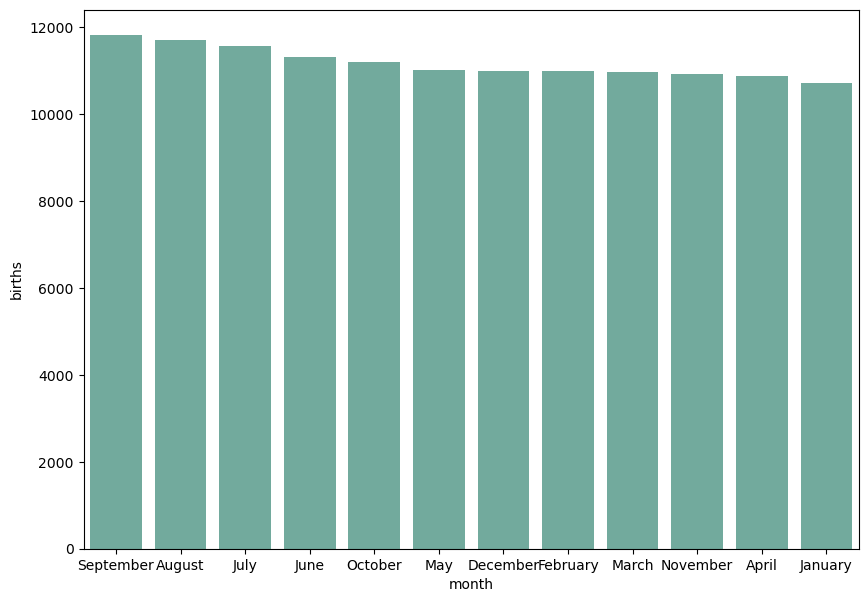

In [20]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=avg_births_month_sorted,
    x="month", 
    y="births",  
    color='#69b3a2');

In [21]:
september_births = all_births[all_births['month'] == 'September']

In [22]:
september_births.sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
5730,2009,September,9,Wednesday,16081
4632,2006,September,7,Thursday,15454
4995,2007,September,5,Wednesday,15440
4631,2006,September,6,Wednesday,15391
4644,2006,September,19,Tuesday,15205
...,...,...,...,...,...
5727,2009,September,6,Sunday,7587
6091,2010,September,5,Sunday,7586
6112,2010,September,26,Sunday,7543
6462,2011,September,11,Sunday,7501


In [23]:
all_births[all_births['month']=='September'].nlargest(1, 'births')['month'].tolist()[0]

'September'

In [24]:
highest_births = all_births[all_births['month']=='September'].nlargest(1, 'births')['month'].tolist()[0]

In [25]:
all_births[all_births['month']==highest_births].sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
5730,2009,September,9,Wednesday,16081
4632,2006,September,7,Thursday,15454
4995,2007,September,5,Wednesday,15440
4631,2006,September,6,Wednesday,15391
4644,2006,September,19,Tuesday,15205
...,...,...,...,...,...
5727,2009,September,6,Sunday,7587
6091,2010,September,5,Sunday,7586
6112,2010,September,26,Sunday,7543
6462,2011,September,11,Sunday,7501


In [27]:
avg_births_year = all_births.groupby('year')['births'].mean().reset_index()

In [28]:
avg_births_year

,year,births
0,1994,10829.498630
1,1995,10683.805479
2,1996,10632.497268
3,1997,10632.586301
4,1998,10798.775342
5,1999,10847.717808
6,2000,11337.699454
7,2001,11262.912329
8,2002,11230.994521
9,2003,11405.643836


In [29]:
avg_births_year_sorted = avg_births_year.sort_values(by='births', ascending=False)

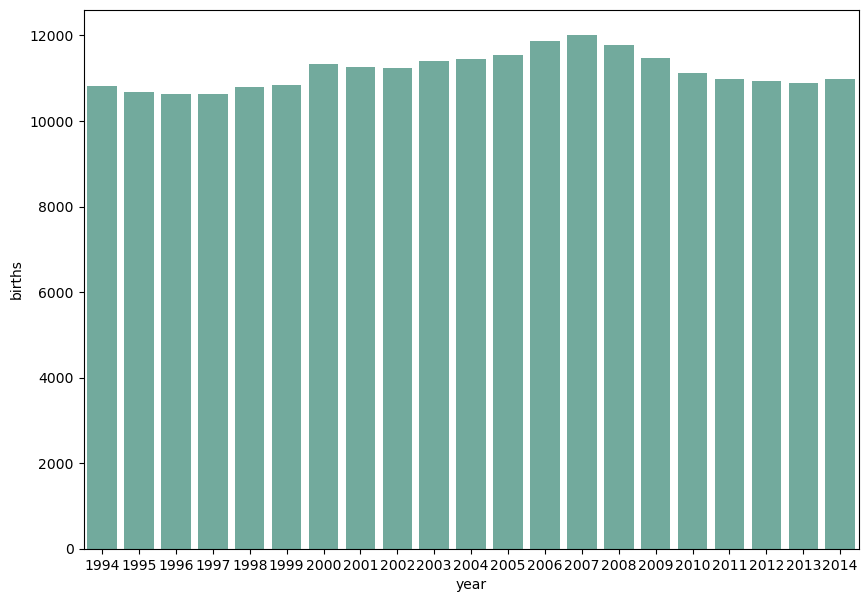

In [30]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=avg_births_year_sorted,
    x="year", 
    y="births",  
    color='#69b3a2');

In [34]:
births_per_year = all_births.groupby('year')['births'].sum().reset_index()

In [35]:
births_per_year

,year,births
0,1994,3952767
1,1995,3899589
2,1996,3891494
3,1997,3880894
4,1998,3941553
5,1999,3959417
6,2000,4149598
7,2001,4110963
8,2002,4099313
9,2003,4163060


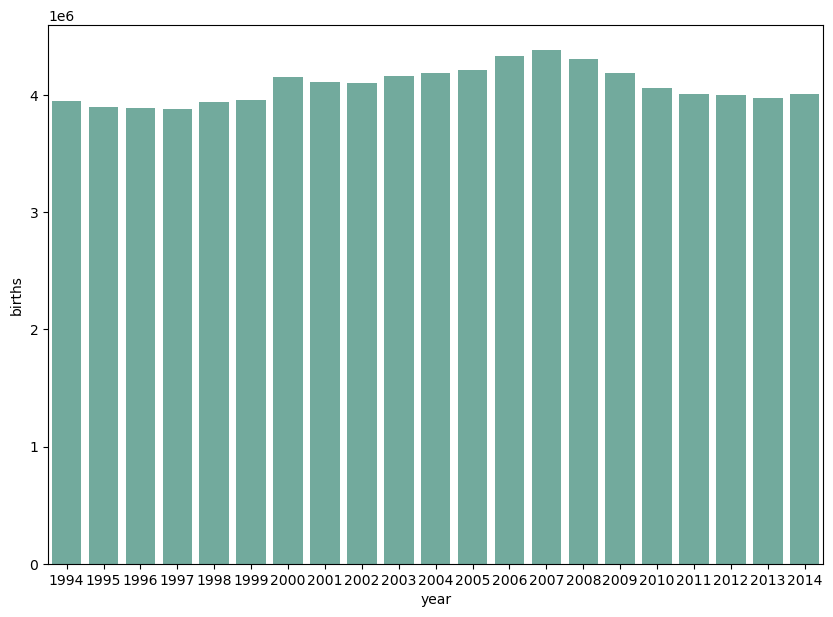

In [36]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=births_per_year,
    x="year", 
    y="births",  
    color='#69b3a2');

In [37]:
all_births.head()

,year,month,date_of_month,day_of_week,births
0,1994,January,1,Saturday,8096
1,1994,January,2,Sunday,7772
2,1994,January,3,Monday,10142
3,1994,January,4,Tuesday,11248
4,1994,January,5,Wednesday,11053


In [41]:
births_on_day = all_births.groupby('date_of_month')['births'].sum().reset_index()

In [42]:
births_on_day

,date_of_month,births
0,1,2765539
1,2,2800019
2,3,2814262
3,4,2766625
4,5,2799489
5,6,2807648
6,7,2836907
7,8,2841066
8,9,2823120
9,10,2846168


In [43]:
births_on_day_sorted = births_on_day.sort_values(by='births', ascending=False)

In [44]:
births_on_day_sorted

,date_of_month,births
19,20,2866645
20,21,2863095
17,18,2856912
16,17,2856781
13,14,2855992
14,15,2852141
11,12,2847886
9,10,2846168
15,16,2843615
18,19,2841717


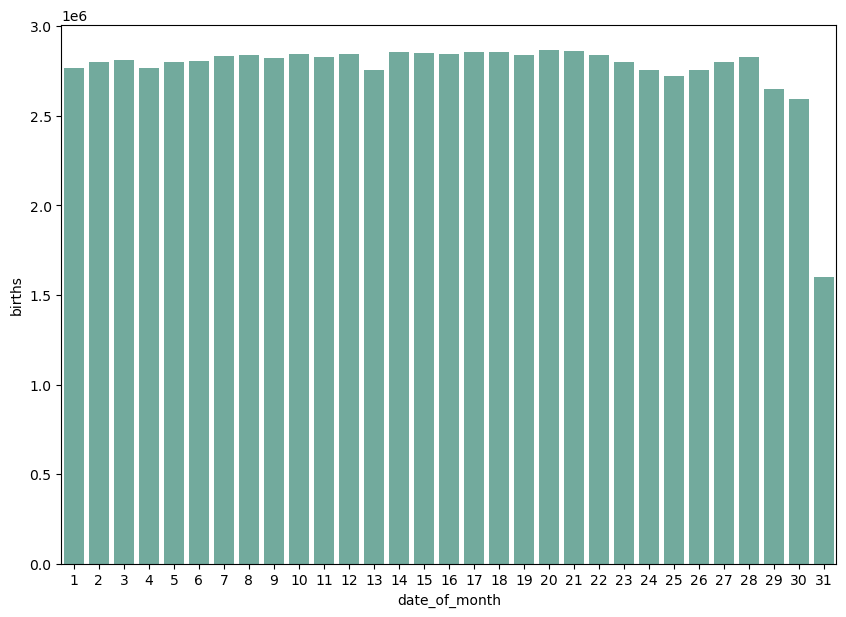

In [46]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=births_on_day_sorted,
    x="date_of_month", 
    y="births",  
    color='#69b3a2');

In [48]:
all_births.sort_values(by='births', ascending=False).head(31)

,year,month,date_of_month,day_of_week,births
5730,2009,September,9,Wednesday,16081
5477,2008,December,30,Tuesday,15645
5108,2007,December,27,Thursday,15590
5109,2007,December,28,Friday,15555
4632,2006,September,7,Thursday,15454
4995,2007,September,5,Wednesday,15440
4631,2006,September,6,Wednesday,15391
5333,2008,August,8,Friday,15374
5101,2007,December,20,Thursday,15214
4644,2006,September,19,Tuesday,15205


In [49]:
all_births.sort_values(by='births', ascending=True).head(31)

,year,month,date_of_month,day_of_week,births
6567,2011,December,25,Sunday,5728
6202,2010,December,25,Saturday,6159
5837,2009,December,25,Friday,6160
4376,2005,December,25,Sunday,6224
4011,2004,December,25,Saturday,6259
6933,2012,December,25,Tuesday,6325
4741,2006,December,25,Monday,6409
5472,2008,December,25,Thursday,6471
6644,2012,March,11,Sunday,6497
6210,2011,January,2,Sunday,6540


In [55]:
all_births[(all_births['date_of_month'] == 13) & (all_births['day_of_week'] == 'Friday')].sort_values(by='births', ascending=False).head(10)

,year,month,date_of_month,day_of_week,births
4941,2007,July,13,Friday,13228
3177,2002,September,13,Friday,13028
7195,2013,September,13,Friday,12669
4668,2006,October,13,Friday,12628
5277,2008,June,13,Friday,12394
3877,2004,August,13,Friday,12275
2750,2001,July,13,Friday,12187
4850,2007,April,13,Friday,12168
6768,2012,July,13,Friday,12109
6068,2010,August,13,Friday,12092


In [56]:
all_births[(all_births['date_of_month'] == 12) & (all_births['day_of_week'] == 'Thursday')].sort_values(by='births', ascending=False).head(10)

,year,month,date_of_month,day_of_week,births
3176,2002,September,12,Thursday,14247
4940,2007,July,12,Thursday,14115
4667,2006,October,12,Thursday,13985
5276,2008,June,12,Thursday,13796
5521,2009,February,12,Thursday,13635
4849,2007,April,12,Thursday,13609
7194,2013,September,12,Thursday,13460
3876,2004,August,12,Thursday,13448
6067,2010,August,12,Thursday,13365
4394,2006,January,12,Thursday,13309


In [57]:
all_births[(all_births['date_of_month'] == 14) & (all_births['day_of_week'] == 'Saturday')].sort_values(by='births', ascending=False).head(10)

,year,month,date_of_month,day_of_week,births
3178,2002,September,14,Saturday,9388
4942,2007,July,14,Saturday,9327
987,1996,September,14,Saturday,9323
2751,2001,July,14,Saturday,9269
2478,2000,October,14,Saturday,9163
2051,1999,August,14,Saturday,9143
1505,1998,February,14,Saturday,9112
3696,2004,February,14,Saturday,8944
651,1995,October,14,Saturday,8920
378,1995,January,14,Saturday,8887


In [60]:
all_births[(all_births['date_of_month'] == 25) & (all_births['month'] == 'December')].sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
358,1994,December,25,Sunday,7192
1089,1996,December,25,Wednesday,7092
1454,1997,December,25,Thursday,7055
723,1995,December,25,Monday,7027
1819,1998,December,25,Friday,7020
3280,2002,December,25,Wednesday,6774
7663,2014,December,25,Thursday,6749
3645,2003,December,25,Thursday,6744
2550,2000,December,25,Monday,6719
2184,1999,December,25,Saturday,6674


In [62]:
all_births[(all_births['date_of_month'] == 14) & (all_births['month'] == 'February')].sort_values(by='births', ascending=False)

,year,month,date_of_month,day_of_week,births
5157,2008,February,14,Thursday,14207
4427,2006,February,14,Tuesday,13886
4792,2007,February,14,Wednesday,13647
2601,2001,February,14,Wednesday,13191
2966,2002,February,14,Thursday,13062
3331,2003,February,14,Friday,13051
6618,2012,February,14,Tuesday,12708
7349,2014,February,14,Friday,12494
409,1995,February,14,Tuesday,12454
6984,2013,February,14,Thursday,12422


In [64]:
shortened_year_column = all_births['year'] % 100

In [65]:
shortened_year_column

0       94
1       94
2       94
3       94
4       94
        ..
7665    14
7666    14
7667    14
7668    14
7669    14
Name: year, Length: 7670, dtype: int64

In [66]:
all_births

,year,month,date_of_month,day_of_week,births
0,1994,January,1,Saturday,8096
1,1994,January,2,Sunday,7772
2,1994,January,3,Monday,10142
3,1994,January,4,Tuesday,11248
4,1994,January,5,Wednesday,11053
...,...,...,...,...,...
7665,2014,December,27,Saturday,8656
7666,2014,December,28,Sunday,7724
7667,2014,December,29,Monday,12811
7668,2014,December,30,Tuesday,13634


In [67]:
all_births_copy = all_births

In [69]:
all_births_copy.head()

,year,month,date_of_month,day_of_week,births
0,1994,January,1,Saturday,8096
1,1994,January,2,Sunday,7772
2,1994,January,3,Monday,10142
3,1994,January,4,Tuesday,11248
4,1994,January,5,Wednesday,11053


In [72]:
all_births_copy['date_of_month'] = all_births_copy['date_of_month'].astype(str).str.zfill(2)
all_births_copy['year'] = all_births_copy['year'].astype(str).str[-2:] 

In [73]:
all_births_copy

,year,month,date_of_month,day_of_week,births
0,94,January,01,Saturday,8096
1,94,January,02,Sunday,7772
2,94,January,03,Monday,10142
3,94,January,04,Tuesday,11248
4,94,January,05,Wednesday,11053
...,...,...,...,...,...
7665,14,December,27,Saturday,8656
7666,14,December,28,Sunday,7724
7667,14,December,29,Monday,12811
7668,14,December,30,Tuesday,13634


In [74]:
replaced_months_copy = {
    "January": "01",
    "February": "02",
    "March": "03",
    "April": "04",
    "May": "05",
    "June": "06",
    "July": "07",
    "August": "08",
    "September": "09",
    "October": "10",
    "November": "11",
    "December": "12"
}

In [75]:
all_births_copy['month'] = all_births_copy['month'].replace(replaced_months_copy)

In [76]:
all_births_copy

,year,month,date_of_month,day_of_week,births
0,94,01,01,Saturday,8096
1,94,01,02,Sunday,7772
2,94,01,03,Monday,10142
3,94,01,04,Tuesday,11248
4,94,01,05,Wednesday,11053
...,...,...,...,...,...
7665,14,12,27,Saturday,8656
7666,14,12,28,Sunday,7724
7667,14,12,29,Monday,12811
7668,14,12,30,Tuesday,13634


In [77]:
def perfect_match(row):
    date= '/'.join([row['date_of_month'], row['month'], row['year']])
    return

In [78]:
all_births_copy[all_births_copy.apply(perfect_match, axis=1)]

KeyError: "None of [Index([None, None, None, None, None, None, None, None, None, None,\n       ...\n       None, None, None, None, None, None, None, None, None, None],\n      dtype='object', length=7670)] are in the [columns]"

In [79]:
start_year = '01'
end_year = '12'
perfect_matches = []

In [83]:
start_year = '01'
end_year = '12'
perfect_matches = []

for year in range(start_year, end_year + 1):
    target_date = {'date_of_month': year, 'month': year, 'year': year}  # Generating the target date dynamically
    matches = all_births_copy[all_births_copy.apply(lambda row: all(row[column] == target_date[column] for column in target_date), axis=1)]
    if not matches.empty:
        all_matches.append(matches)

TypeError: can only concatenate str (not "int") to str

In [81]:
all_births_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           7670 non-null   object
 1   month          7670 non-null   object
 2   date_of_month  7670 non-null   object
 3   day_of_week    7670 non-null   object
 4   births         7670 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 299.7+ KB
